# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
city_data = []


print("-----------------------------")
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        #retrieve data
        city_weather = requests.get(city_url).json()

        # max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 

print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

-----------------------------
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | te anau
Processing Record 4 of Set 1 | pisco
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | panjakent
Processing Record 7 of Set 1 | pierre
Processing Record 8 of Set 1 | coahuayana
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | clyde river
Processing Record 11 of Set 1 | coquimbo
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | sinnamary
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | rapid valley
Processing Record 21 of Set 1 | mataura
Processing R

Processing Record 38 of Set 4 | tura
Processing Record 39 of Set 4 | iqaluit
Processing Record 40 of Set 4 | roald
Processing Record 41 of Set 4 | si chiang mai
Processing Record 42 of Set 4 | vaini
Processing Record 43 of Set 4 | east london
Processing Record 44 of Set 4 | yar-sale
Processing Record 45 of Set 4 | bandarbeyla
Processing Record 46 of Set 4 | nouadhibou
Processing Record 47 of Set 4 | montbrison
Processing Record 48 of Set 4 | karratha
Processing Record 49 of Set 4 | norman wells
Processing Record 0 of Set 5 | porto walter
Processing Record 1 of Set 5 | jalu
Processing Record 2 of Set 5 | aldan
Processing Record 3 of Set 5 | voh
Processing Record 4 of Set 5 | mursalimkino
Processing Record 5 of Set 5 | sovetskiy
Processing Record 6 of Set 5 | mitsamiouli
Processing Record 7 of Set 5 | lyngdal
Processing Record 8 of Set 5 | pevek
Processing Record 9 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 5 | oshogbo
City not found. Skipping...
Proc

Processing Record 27 of Set 8 | ixtapa
Processing Record 28 of Set 8 | grindavik
Processing Record 29 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 30 of Set 8 | dickinson
Processing Record 31 of Set 8 | sorland
Processing Record 32 of Set 8 | mungwi
Processing Record 33 of Set 8 | merauke
Processing Record 34 of Set 8 | avramesti
Processing Record 35 of Set 8 | arlit
Processing Record 36 of Set 8 | inhuma
Processing Record 37 of Set 8 | hamilton
Processing Record 38 of Set 8 | palafrugell
Processing Record 39 of Set 8 | gardan diwal
City not found. Skipping...
Processing Record 40 of Set 8 | ubinskoye
Processing Record 41 of Set 8 | port macquarie
Processing Record 42 of Set 8 | faanui
Processing Record 43 of Set 8 | pangnirtung
Processing Record 44 of Set 8 | aleksandrovskiy zavod
Processing Record 45 of Set 8 | khvorostyanka
Processing Record 46 of Set 8 | tila
Processing Record 47 of Set 8 | moosomin
Processing Record 48 of Set 8 | vila vicosa
Processing Record 4

Processing Record 7 of Set 12 | pedernales
Processing Record 8 of Set 12 | grand forks
Processing Record 9 of Set 12 | henties bay
Processing Record 10 of Set 12 | grootfontein
Processing Record 11 of Set 12 | barguzin
Processing Record 12 of Set 12 | sal rei
Processing Record 13 of Set 12 | camopi
Processing Record 14 of Set 12 | beloha
Processing Record 15 of Set 12 | zaqatala
Processing Record 16 of Set 12 | maine-soroa
Processing Record 17 of Set 12 | shasta lake
Processing Record 18 of Set 12 | ayan
Processing Record 19 of Set 12 | portland
Processing Record 20 of Set 12 | quarai
Processing Record 21 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 22 of Set 12 | bloomfield
Processing Record 23 of Set 12 | west melbourne
Processing Record 24 of Set 12 | yarkovo
Processing Record 25 of Set 12 | sungaipenuh
Processing Record 26 of Set 12 | auki
Processing Record 27 of Set 12 | san patricio
Processing Record 28 of Set 12 | tobias barreto
Processing Record 29 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_pd = pd.DataFrame(city_data)

lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Lat           572
Lng           572
Max Temp      572
Wind Speed    572
dtype: int64

In [5]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,99,AU,1555536021,63,-33.64,115.35,46.00,7.49
1,bredasdorp,0,ZA,1555535736,76,-34.53,20.04,55.40,1.12
2,te anau,0,NZ,1555536266,80,-45.41,167.72,44.93,3.13
3,pisco,0,PE,1555535796,30,-13.71,-76.20,75.00,10.29
4,tasiilaq,62,GL,1555534200,88,65.61,-37.64,37.40,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

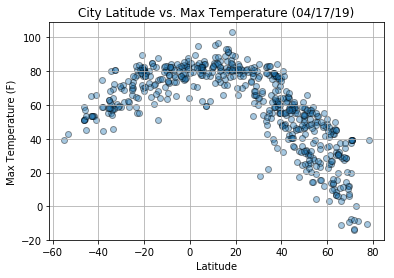

In [6]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.4, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Max_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

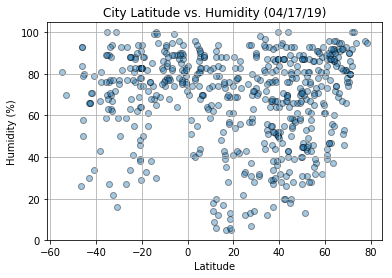

In [7]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.4, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

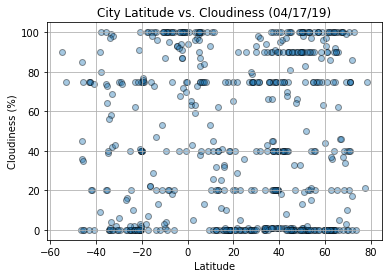

In [8]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.4, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

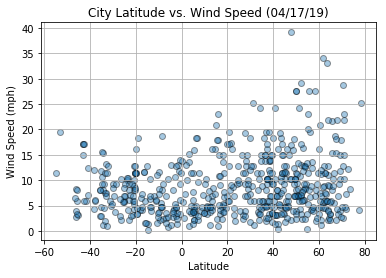

In [9]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.4, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Wind Speed.png")

# Show plot
plt.show()